# Task III: Open Task 
### Task objectives:
- Comment on a quantum computing or a quantum machine learning.

### Deutsch–Jozsa Algorithm

I will take in this task about the famous Deutsch Jozsa algorithm, developed in the 1992. The algorithm objective is to make a decision on whether the set of $0$ and $1$ numbers, $X$, is constant or balanced.

The definition of constant is as follows:

- Constant: $\forall x \in X, x=0$ or $x=1$
- Balanced: $\forall x=0, \forall y=1 \in X$, $\sum x+1 = \sum y$

Assume that the set $X$ is passed to a black box function $f$. To solve this problem classically, one will have to query each element in the set, this will require evaluating the function $f$ a total of $2^{n-1}+1$ times. Deutsch and Jozsa have argued and demostrated a quantum circuit that exponentionally decreases the evaluation time. In the DE algorithm, $f$ is called only once.

Although the algorithm itself is of no wide spread use, it is one of the first proof of concept algorithms that demostrate the clear advantages of quantum computing over classical computing.

The following is a circuit example of the Deutsch Jozsa algorithm, inspired by [Qiskit textbook example](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb).

In [1]:
import numpy as np
import pennylane as qml

In [2]:
import pennylane as qml
from pennylane import numpy as np

# You can just change the following number to test balanced and constant 
# oracles.
n = 5
dev = qml.device("default.qubit", wires=n+1, shots=1)

# do nothing
def constant_oracle(wires):
    pass

# CNOT on the output qubit to keep track of inputs
def balanced_oracle(wires):
    for i in list(range(n))[::2]: qml.CNOT(wires=[wires[i], wires[-1]])

def deutsch_jozsa_alg(oracle, visualize=False):

    @qml.qnode(dev)
    def circuit():
        # initialize the last qubit to |1>
        qml.PauliX(wires=n)

        # Apply Hadamard on all qubits
        for i in range(n+1):
            qml.Hadamard(wires=i)

        qml.Barrier()

        # apply the oracle
        oracle(wires=range(n+1))

        qml.Barrier()
        
        # apply Hadamard on input qubits once more
        for i in range(n):
            qml.Hadamard(wires=i)

        # now measure the wires
        return qml.sample(wires=range(n))

    if visualize: return circuit
    return circuit()

# run on the circuit above
const_result = deutsch_jozsa_alg(constant_oracle)
bal_result = deutsch_jozsa_alg(balanced_oracle)

print("Constant Oracle Result:", const_result)
print("Balanced Oracle Result:", bal_result)

print("\nInterpretation:")
print("Constant Oracle is:", "Constant" if np.all(const_result == 0) else "Balanced")
print("Balanced Oracle is:", "Constant" if np.all(bal_result == 0) else "Balanced")

Constant Oracle Result: [0 0 0 0 0]
Balanced Oracle Result: [1 0 1 0 1]

Interpretation:
Constant Oracle is: Constant
Balanced Oracle is: Balanced


(<Figure size 1100x700 with 1 Axes>, <Axes: >)

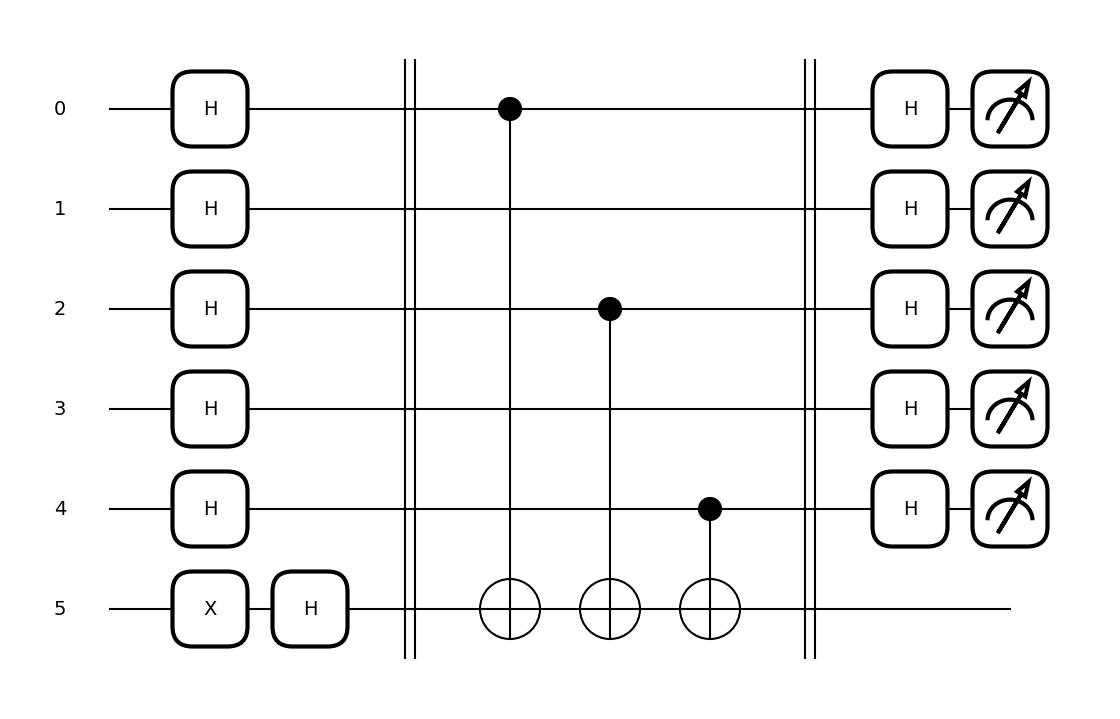

In [3]:
# Let us visualize the balanced circuit

balanced_circuit = deutsch_jozsa_alg(balanced_oracle,True)
qml.draw_mpl(balanced_circuit)()